In [2]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
#reading the dataset
df=pd.read_excel("/content/Healthcare_dataset.xlsx", sheet_name='Dataset')

In [4]:
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [5]:
df.shape

(3424, 69)

In [6]:
#information on the numerical columns
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [8]:
# Calculate skewness only for numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols].skew(axis=0, skipna=True)

,0
Dexa_Freq_During_Rx,6.808730
Count_Of_Risks,0.879791


In [9]:

# checking for missing variables
df.isnull().sum()

,0
Ptid,0
Persistency_Flag,0
Gender,0
Race,0
Ethnicity,0
Region,0
Age_Bucket,0
Ntm_Speciality,0
Ntm_Specialist_Flag,0
Ntm_Speciality_Bucket,0


In [10]:
df.dtypes

,0
Ptid,object
Persistency_Flag,object
Gender,object
Race,object
Ethnicity,object
Region,object
Age_Bucket,object
Ntm_Speciality,object
Ntm_Specialist_Flag,object
Ntm_Speciality_Bucket,object


In [11]:
#List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  2


,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1


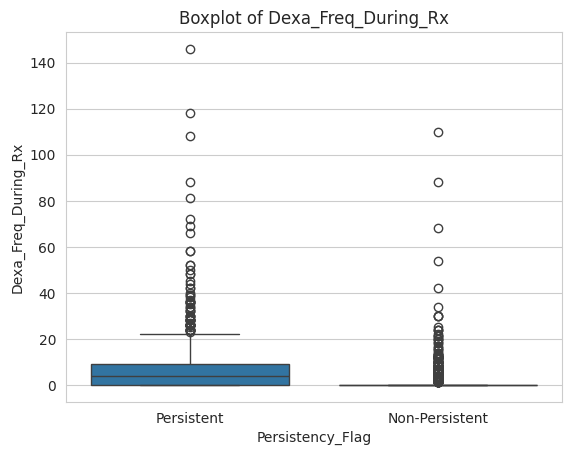

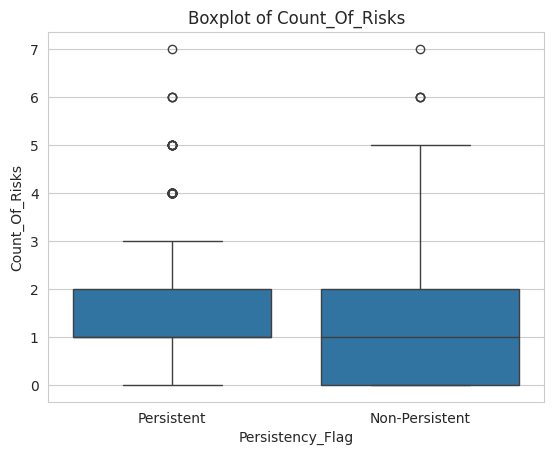

In [12]:
for col in numerical_features:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col)
        plt.show()

In [13]:
df.drop(['Ptid'], axis=1, inplace=True)

In [14]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure'

In [15]:
for col in categorical_features:
    print(df[col].value_counts())


Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64
Gender
Female    3230
Male       194
Name: count, dtype: int64
Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64
Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64
Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64
Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64
Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS A

In [16]:
#number of categories in the categorical features
#for feature in categorical_features:
   # print('The feature is {} and number of categories are {}'.format(feature,(df[feature].unique())))

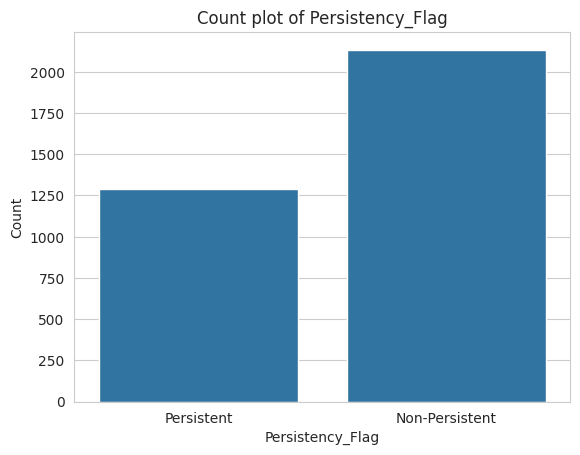

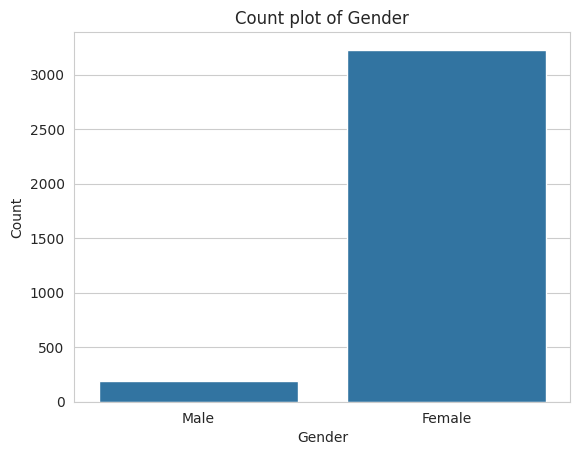

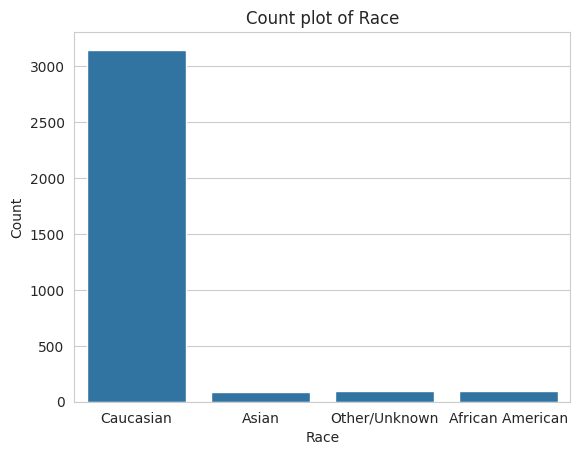

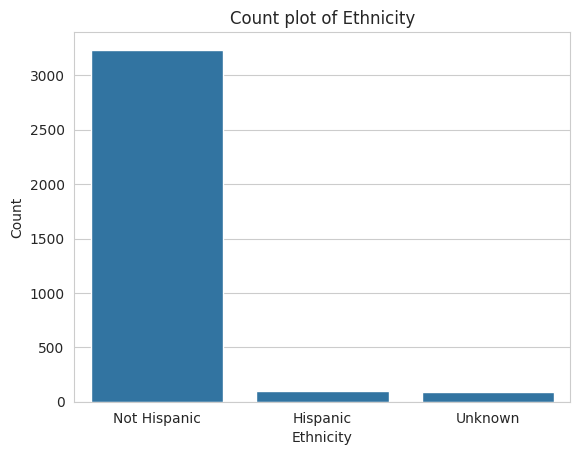

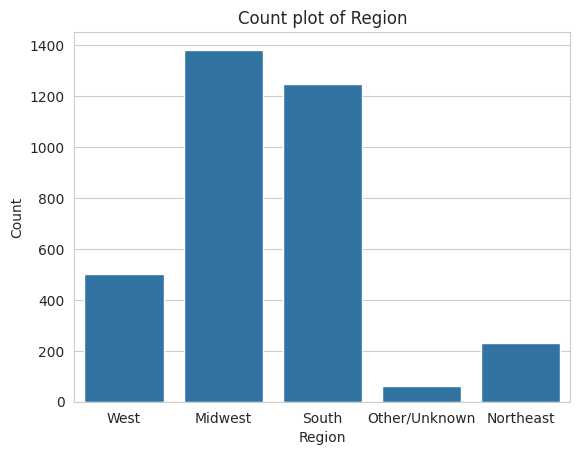

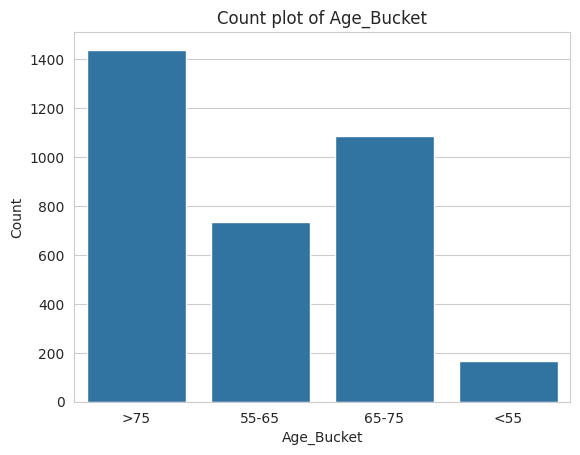

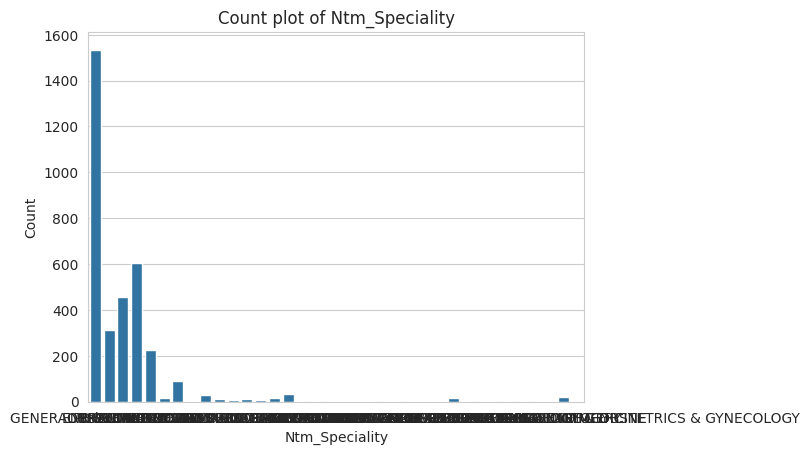

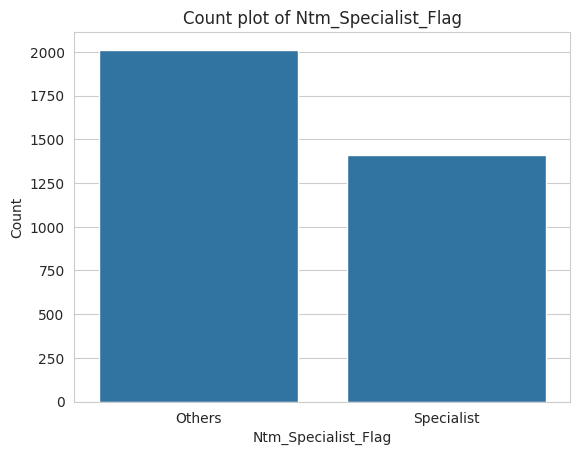

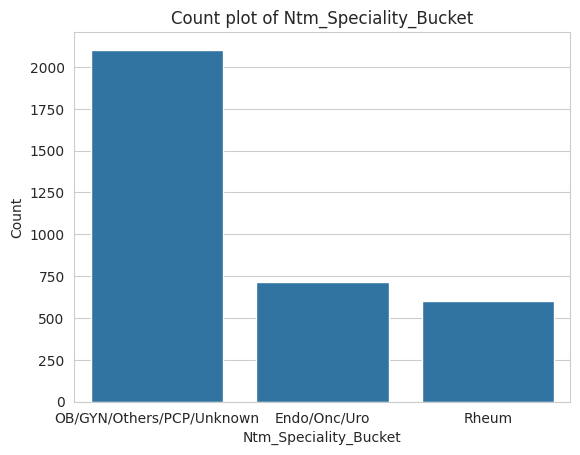

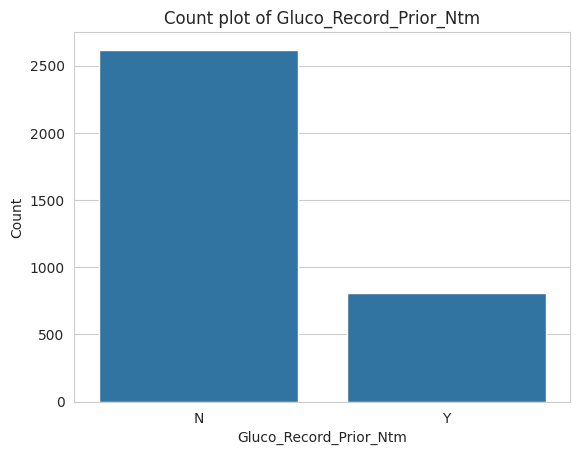

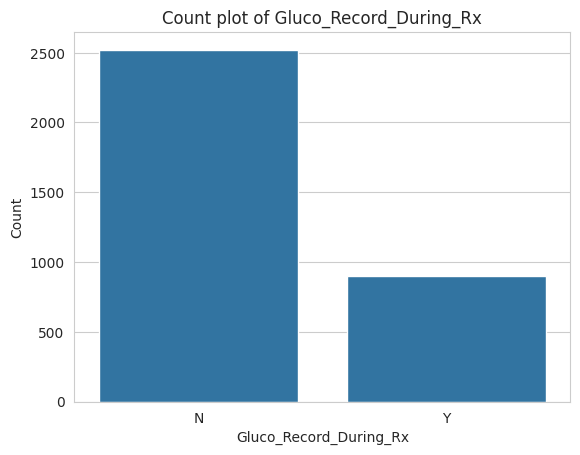

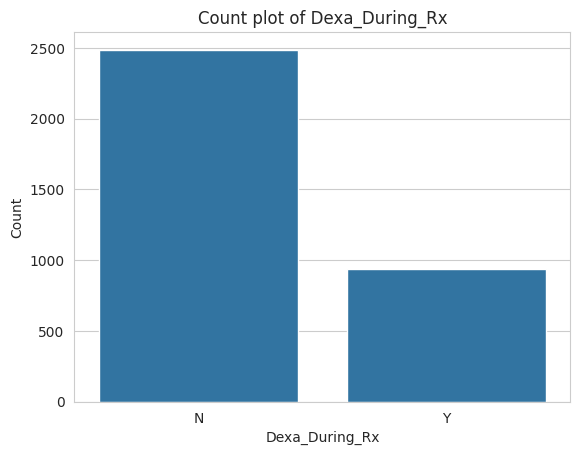

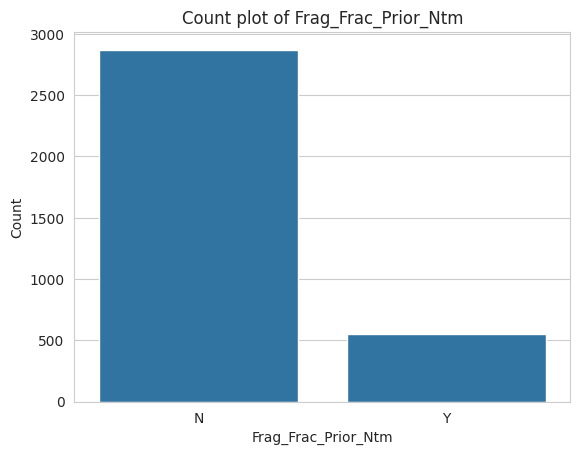

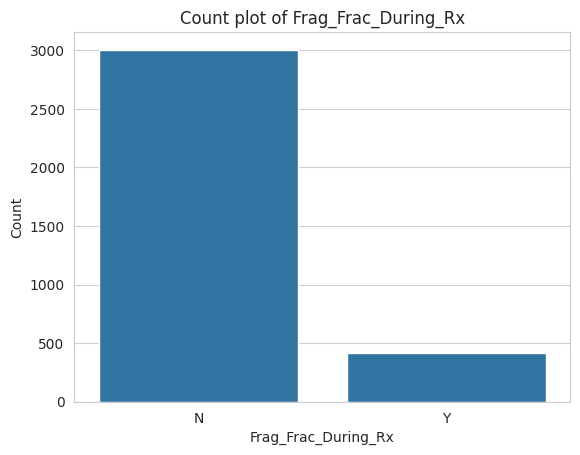

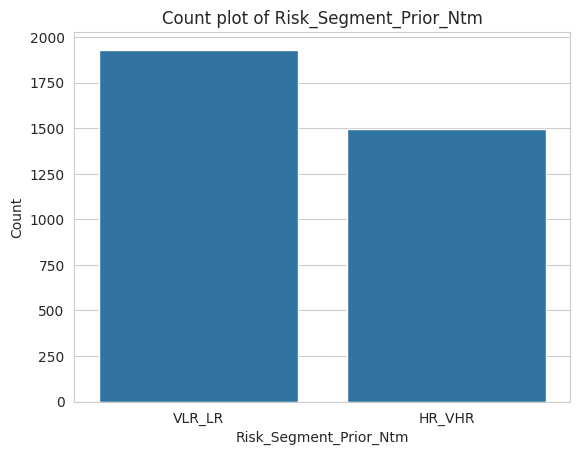

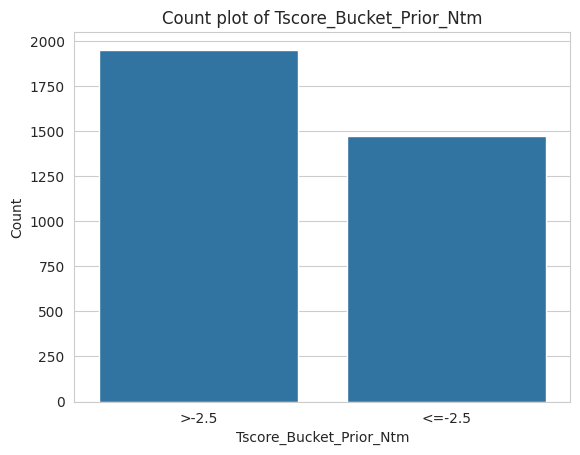

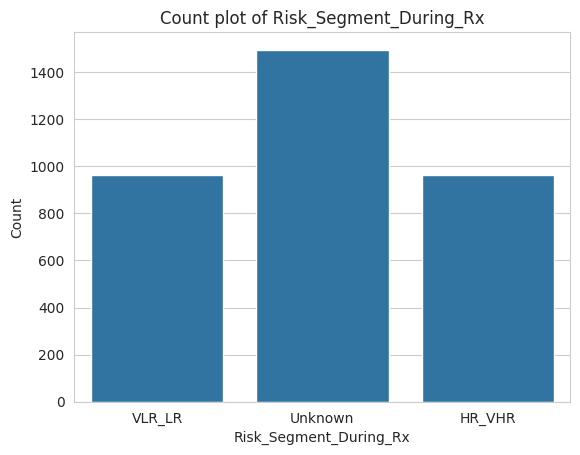

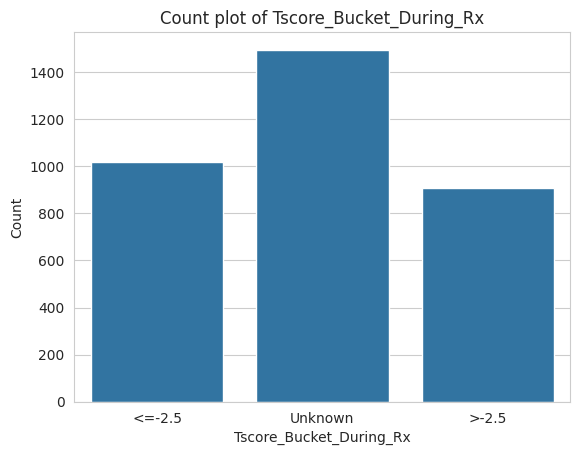

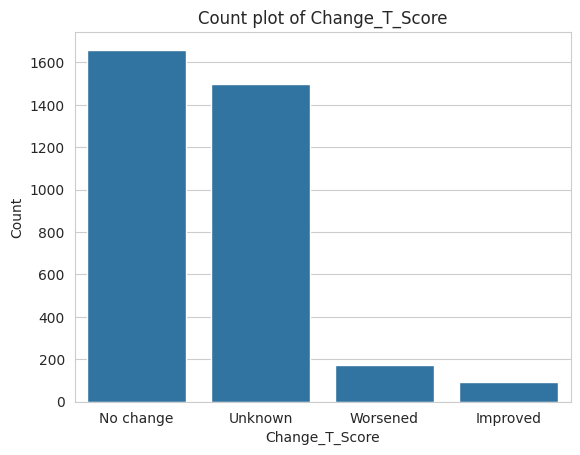

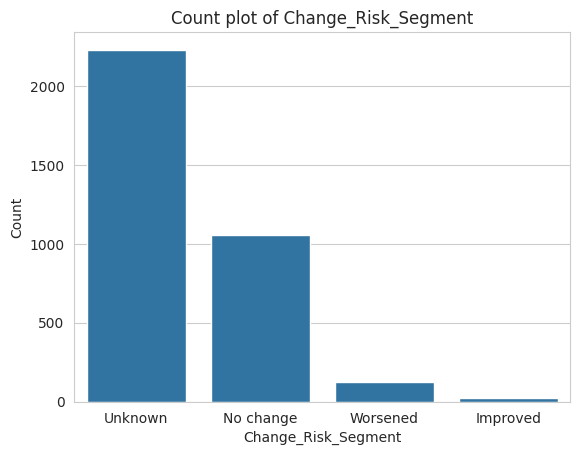

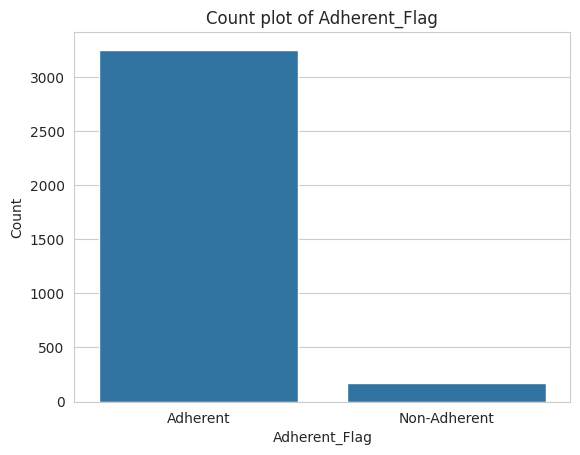

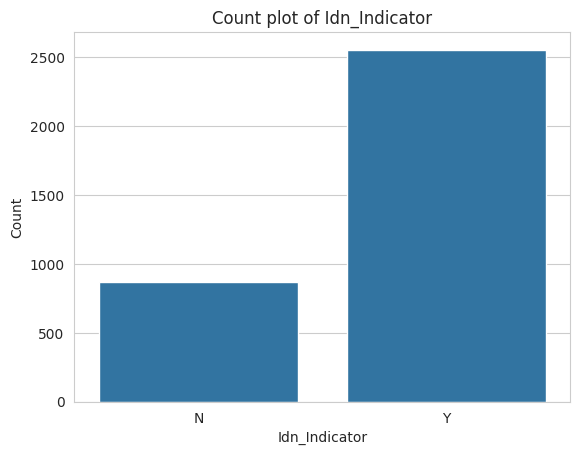

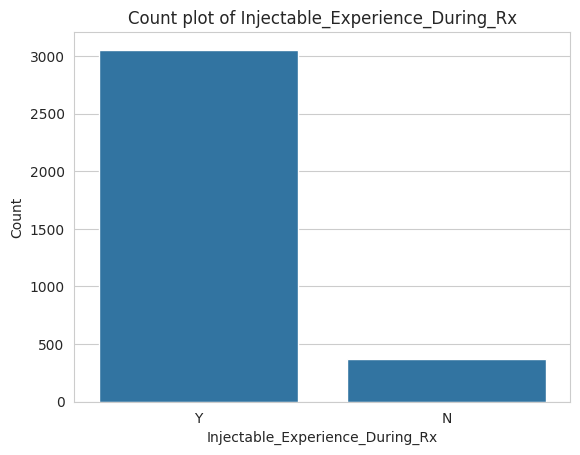

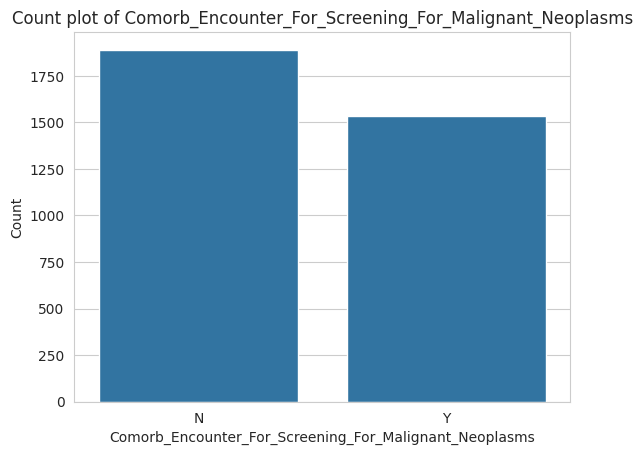

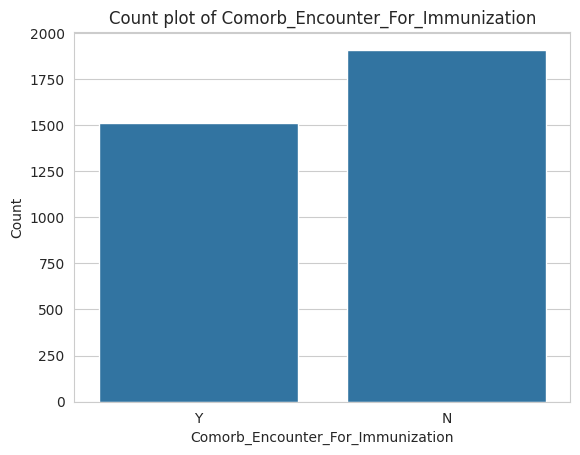

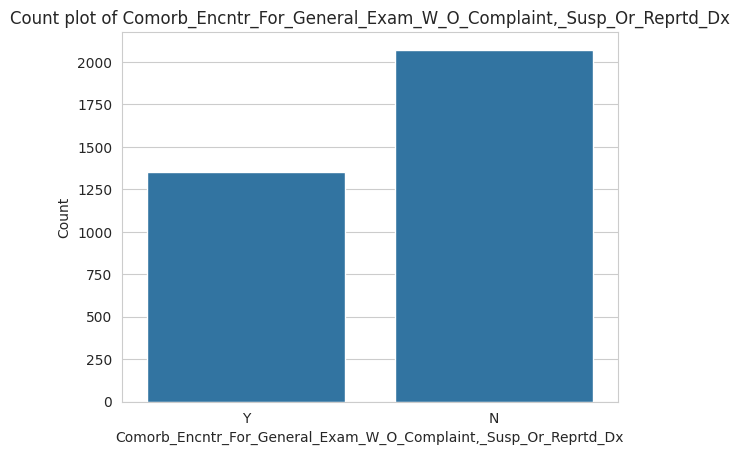

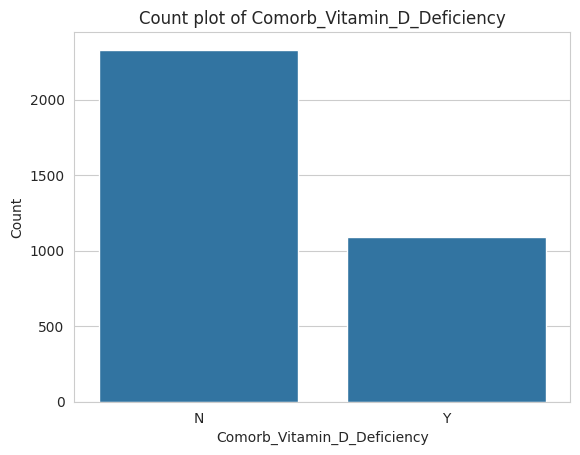

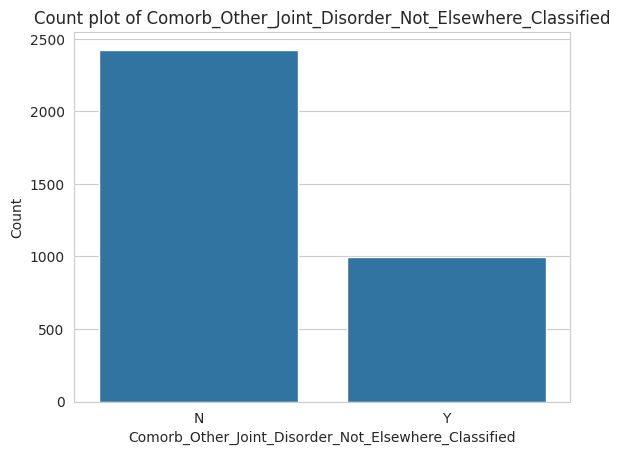

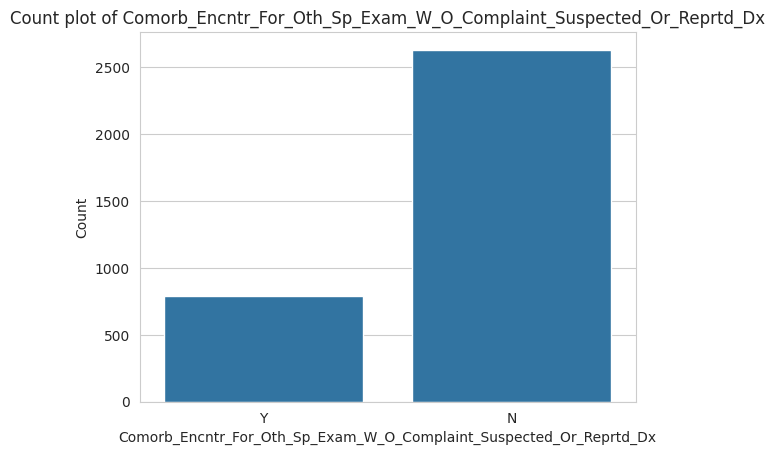

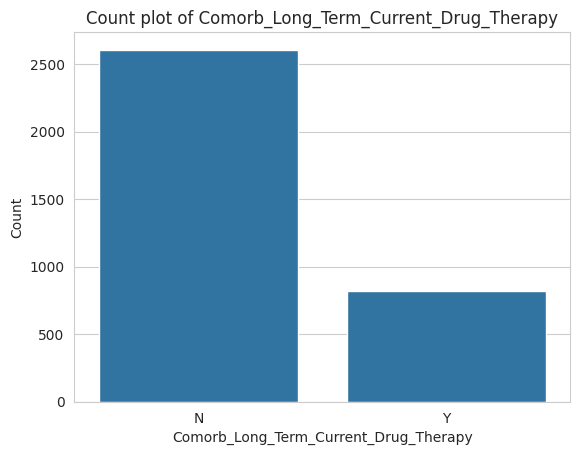

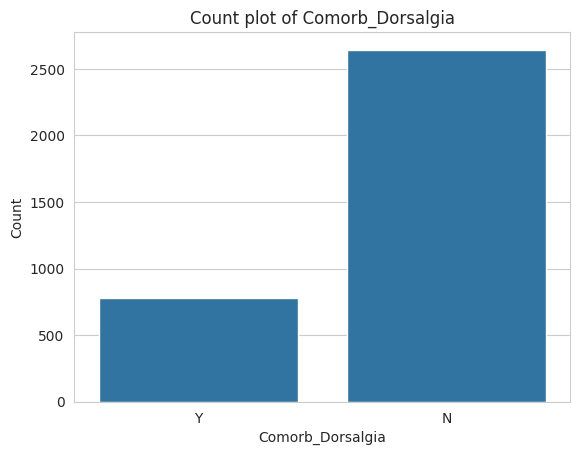

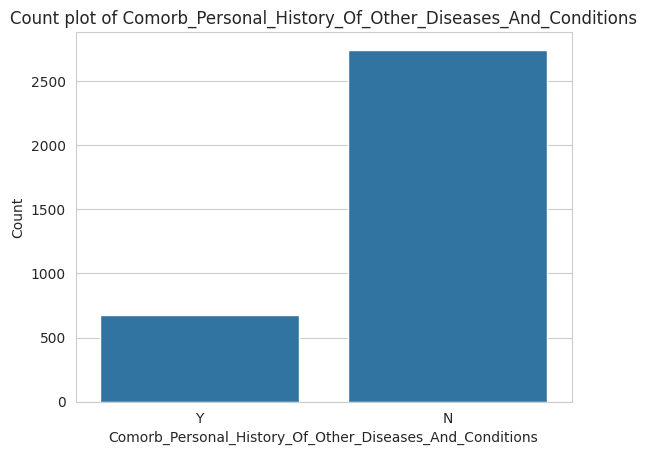

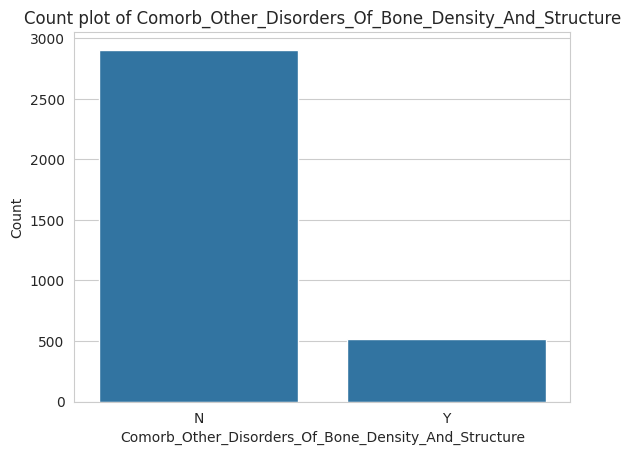

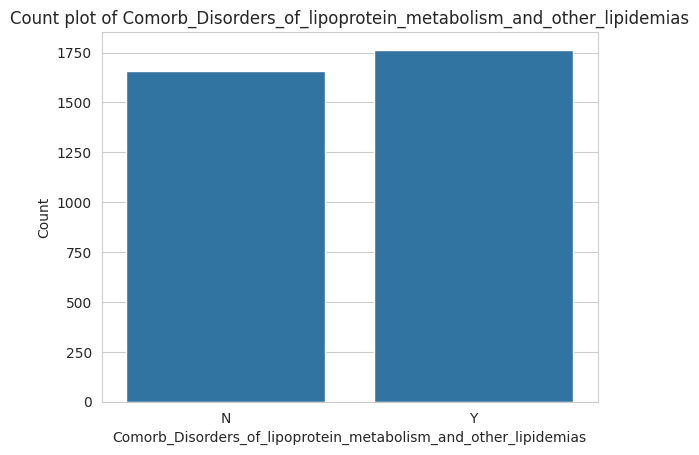

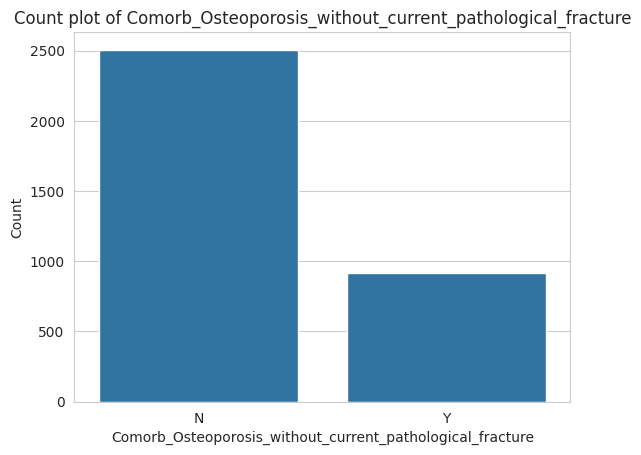

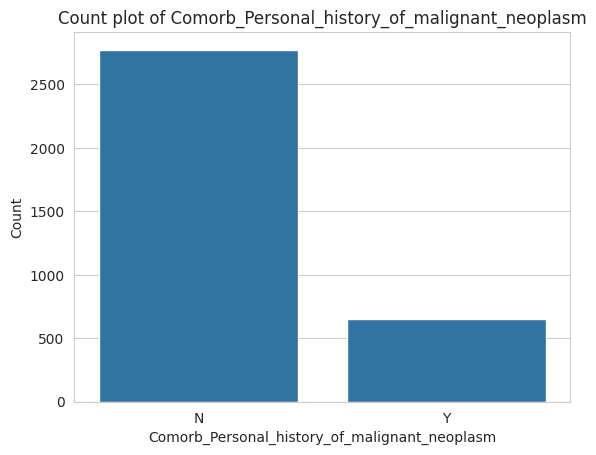

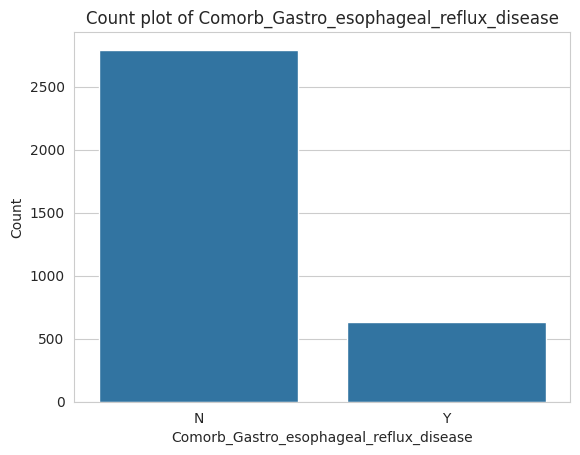

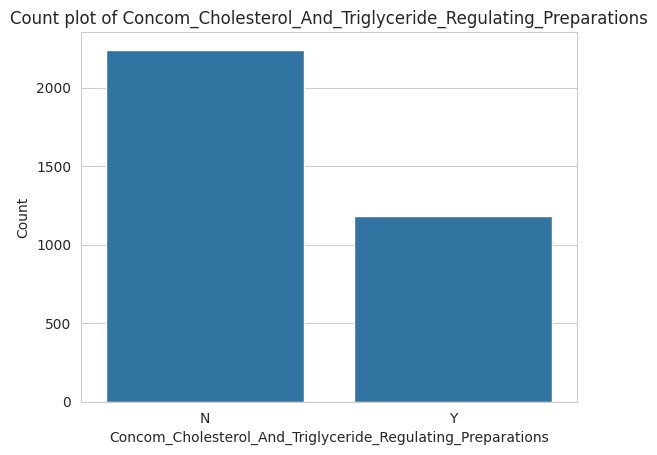

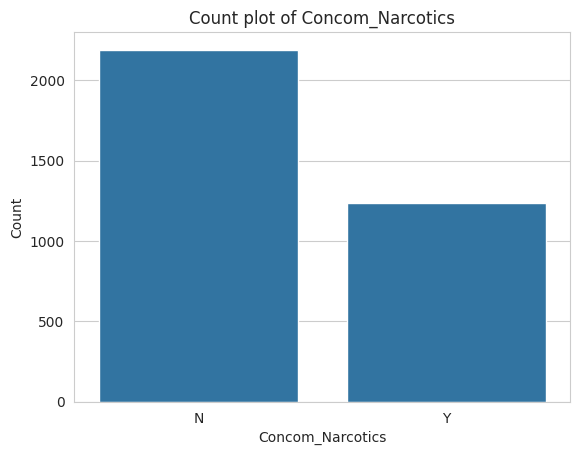

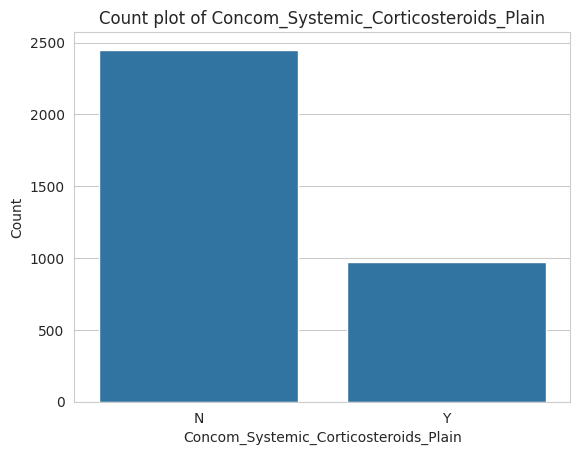

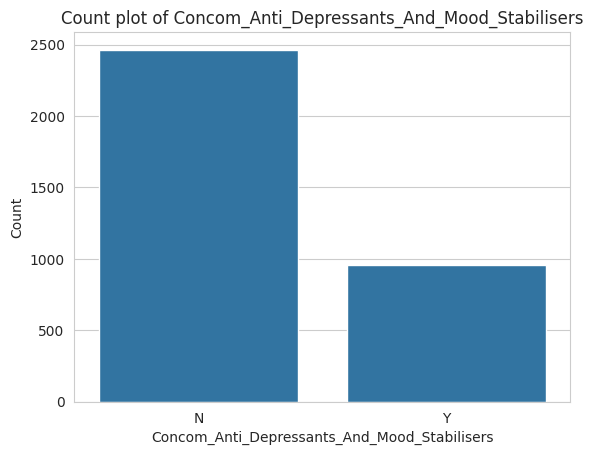

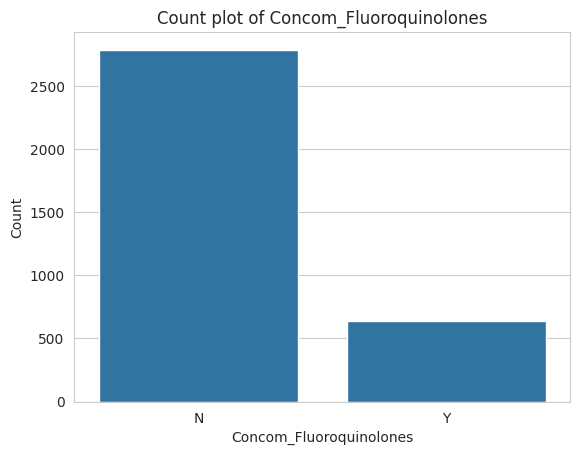

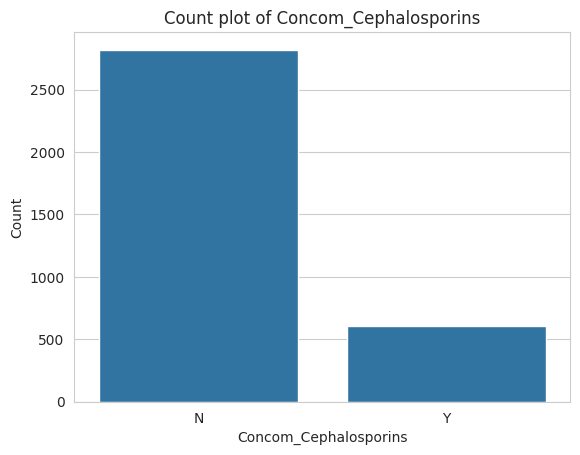

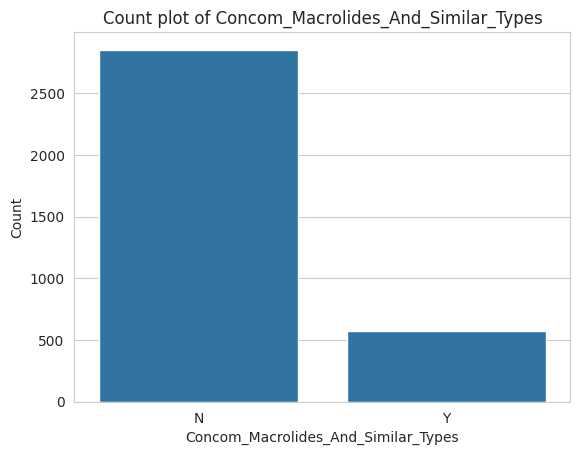

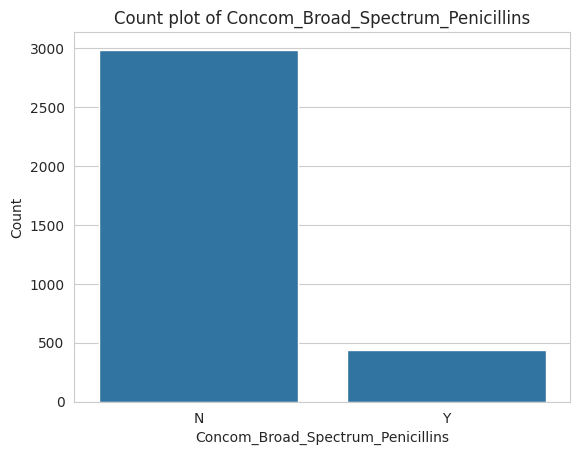

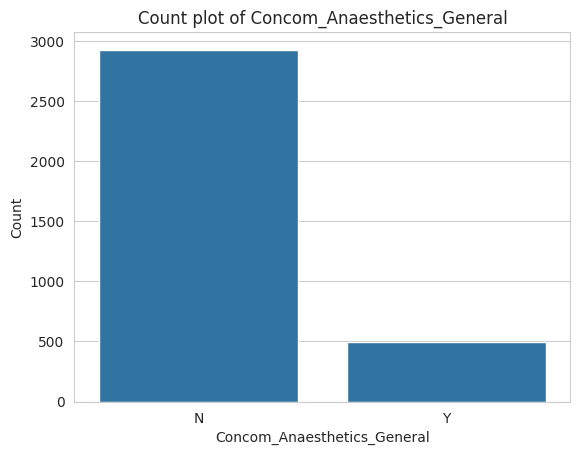

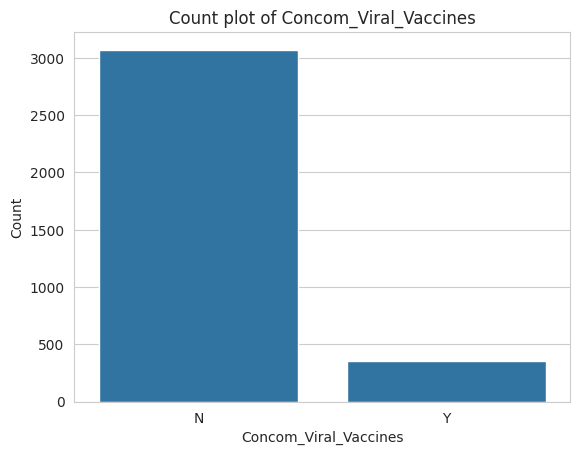

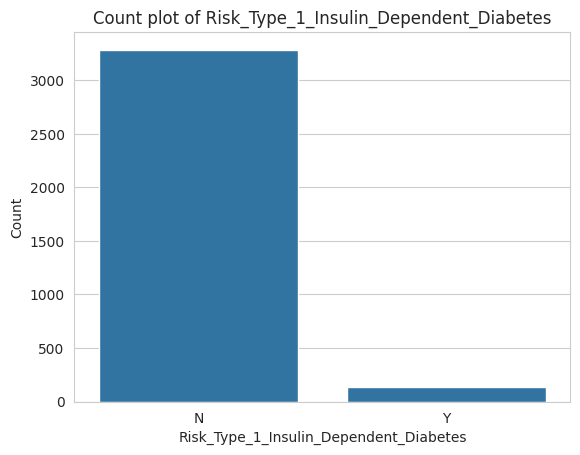

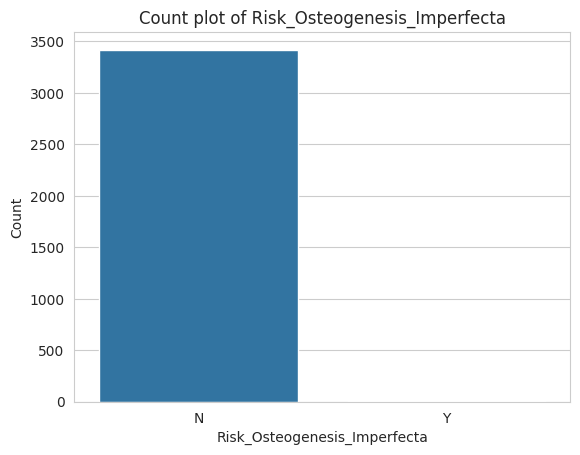

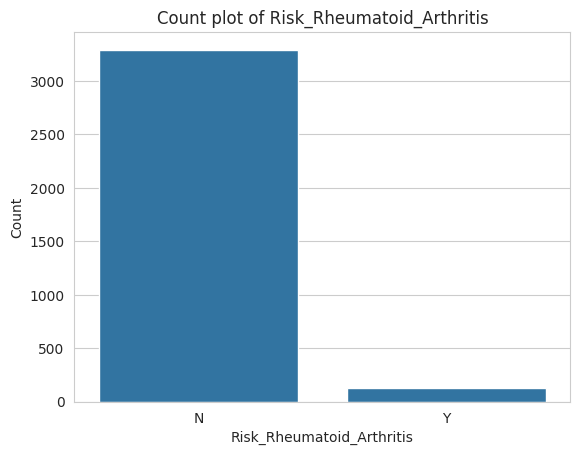

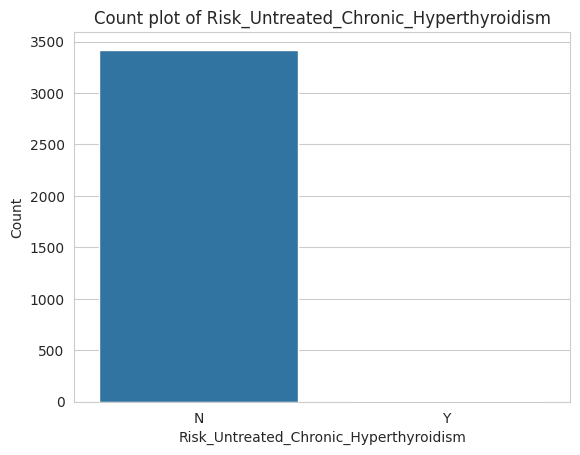

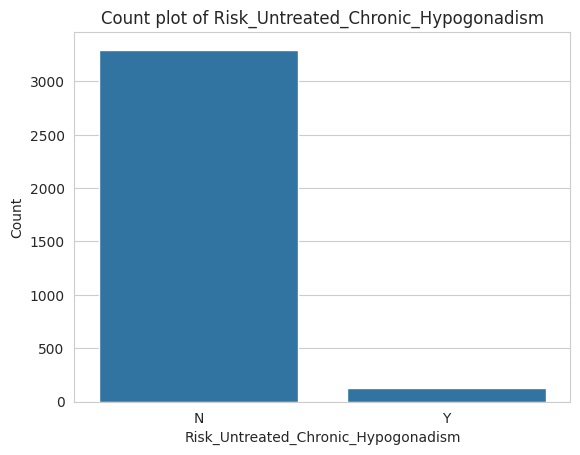

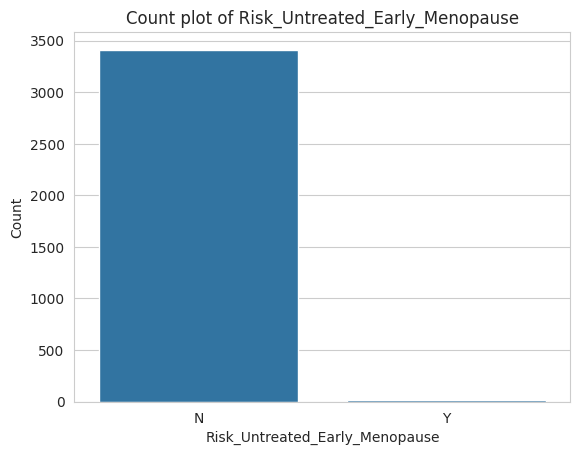

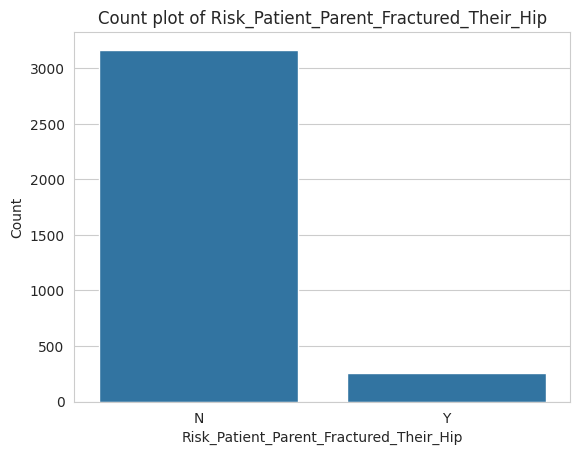

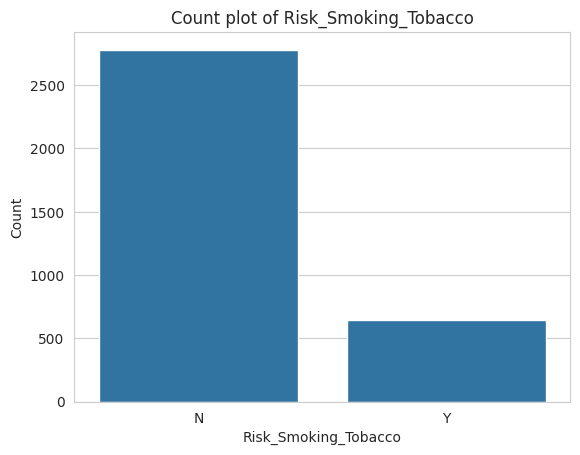

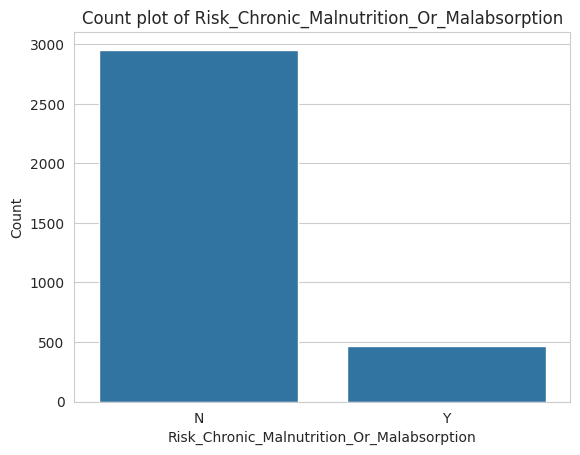

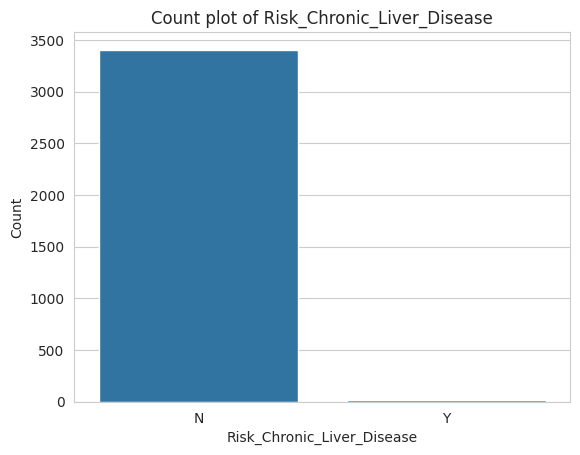

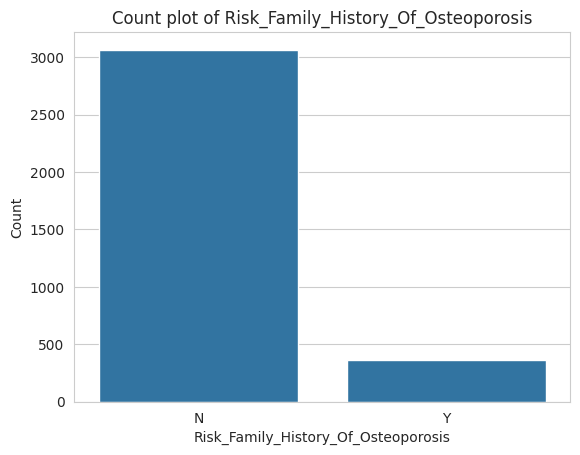

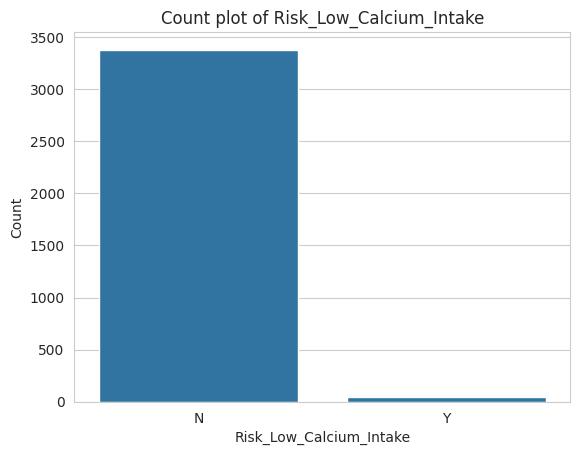

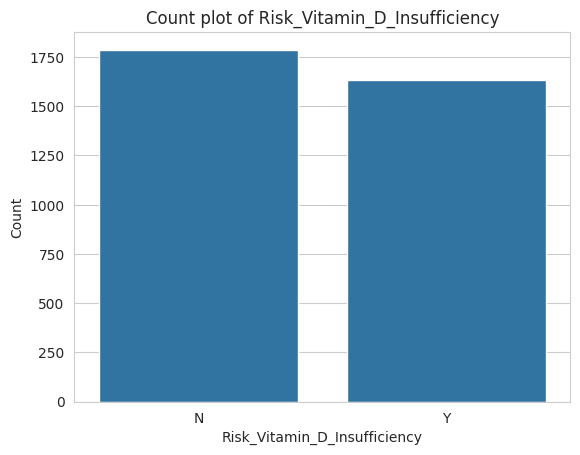

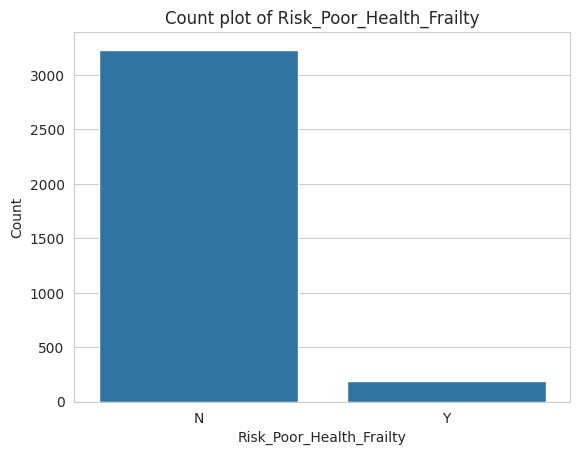

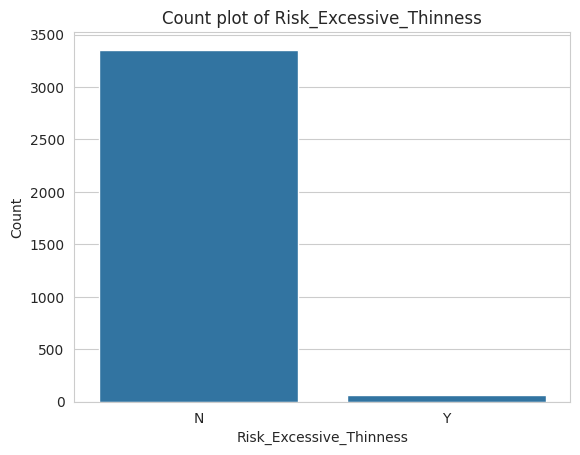

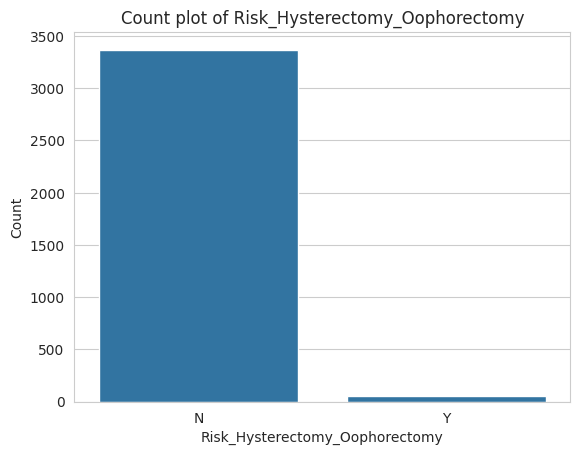

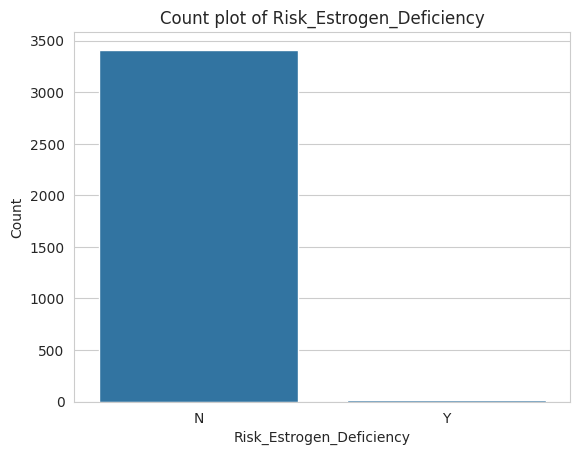

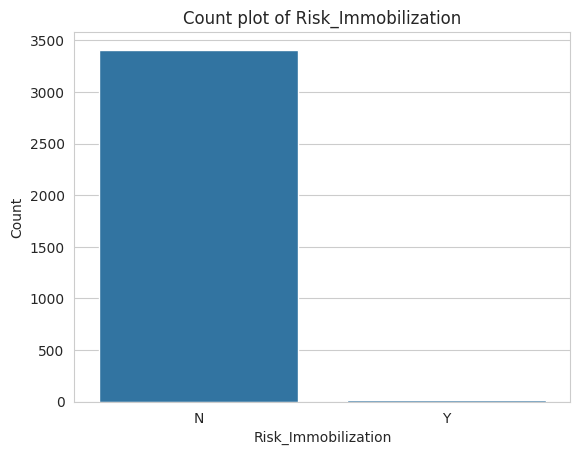

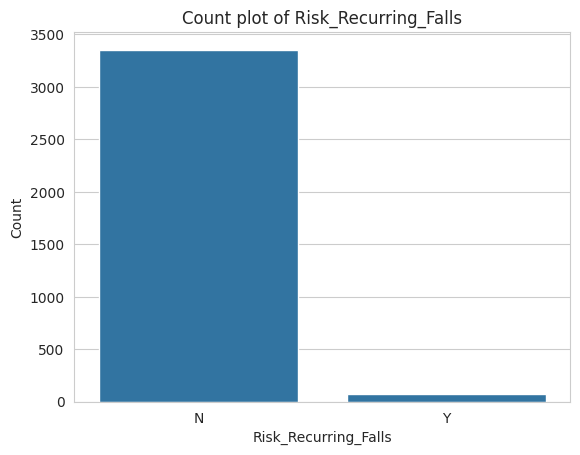

In [17]:
for col in categorical_features:
        sns.set_style('whitegrid')
        sns.countplot(x=col, data=df)
        plt.title('Count plot of ' + col)
        plt.ylabel('Count')
        plt.show()

# Detecting and treatment of Outliers


Boolean Method

In [18]:
#for Count_Of_Risks, find IQR
Q1 = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR=Q3-Q1
IQR

3.0

In [19]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df['Dexa_Freq_During_Rx'] > (Q3 + 1.5 * IQR))
mask_high

,Dexa_Freq_During_Rx
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [20]:
mask_high.sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: bool>

In [21]:
#This will return the sum of the high outliers in column.
df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)

<ipython-input-21-84ef8848a6f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)
<ipython-input-21-84ef8848a6f1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)


In [22]:
#find and change the values of the high outliers,this is call capping
df.Dexa_Freq_During_Rx[mask_high]

,Dexa_Freq_During_Rx
32,7.5
33,7.5
62,7.5
65,7.5
89,7.5
101,7.5
110,7.5
116,7.5
164,7.5
180,7.5


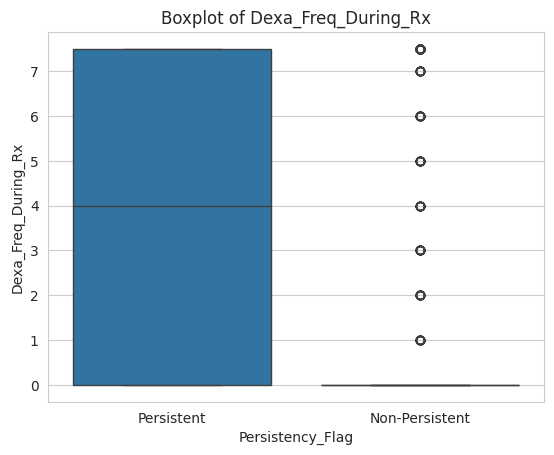

In [23]:
#Boxplot to check the outliers
sns.set_style('whitegrid')
sns.boxplot(x='Persistency_Flag', y='Dexa_Freq_During_Rx', data=df)
plt.title('Boxplot of Dexa_Freq_During_Rx')
plt.ylabel('Dexa_Freq_During_Rx')
plt.show()

In [24]:
#for Count_Of_Risks, find IQR
Q1 = df['Count_Of_Risks'].quantile(0.25)
Q3 = df['Count_Of_Risks'].quantile(0.75)
IQR=Q3-Q1
IQR

2.0

In [25]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df['Count_Of_Risks'] > (Q3 + 1.5 * IQR))
mask_high

,Count_Of_Risks
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [28]:

mask_high.sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool>

In [29]:
#This will return the sum of the high outliers in column.
df.Count_Of_Risks[mask_high] = (Q3 + 1.5 * IQR)

<ipython-input-29-368489247ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Count_Of_Risks[mask_high] = (Q3 + 1.5 * IQR)


In [30]:
##find and change the values of the high outliers,this is call capping
df.Count_Of_Risks[mask_high]

,Count_Of_Risks
342,5
817,5
1059,5
2601,5
2860,5
3045,5
3146,5
3340,5


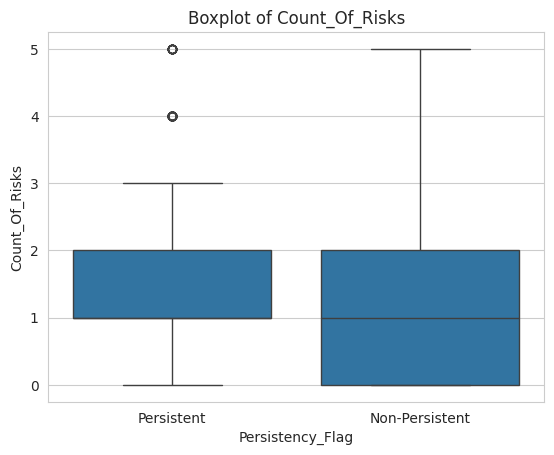

In [31]:
#Box plot to check for outliers
sns.set_style('whitegrid')
sns.boxplot(x='Persistency_Flag', y='Count_Of_Risks', data=df)
plt.title('Boxplot of Count_Of_Risks')
plt.ylabel('Count_Of_Risks')
plt.show()

In [32]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,1.692465,1.236565
std,2.908085,1.082944
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,7.500000,5.000000
